
# k-Nearest Neighbours

Classification (output variable takes discrete/class labels) in iris dataset

Regression (output variable takes continuous values) in Boston house prices


## k-Nearest Neighbors Classifier (iris dataset)

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [2]:
X, y  = datasets.load_iris(return_X_y=True) 
# X features in cols: sepal length, sepal width, petal length, petal width
# y species of each flower (setosa (0), versicolor (1), virginica (2)) 

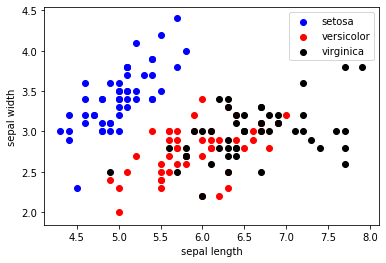

In [3]:
plt.scatter(X[:50,0],X[:50,1],color='blue',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='red',label='versicolor')
plt.scatter(X[100:150,0],X[100:150,1],color='black',label='virginica')
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

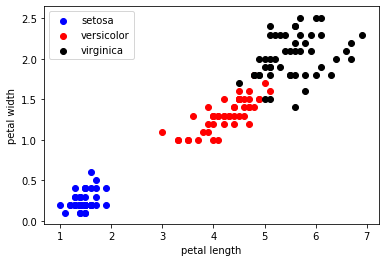

In [4]:
plt.scatter(X[:50,2],X[:50,3],color='blue',label='setosa')
plt.scatter(X[50:100,2],X[50:100,3],color='red',label='versicolor')
plt.scatter(X[100:150,2],X[100:150,3],color='black',label='virginica')
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
scaler = StandardScaler()
scaler.fit(X_train) # fit only the training data
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [7]:
k = 3 # 3 NN 
knn = KNeighborsClassifier(n_neighbors=k)

In [8]:
knn.fit(X_train_std, y_train) # train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
pred = knn.predict(X_test_std) # evaluate on test set
print(accuracy_score(y_test,pred)) # accuracy

0.98


## Cross Validation -  for different k values

Evaluate algorithm's accuracy as we tune the hyperparameter k

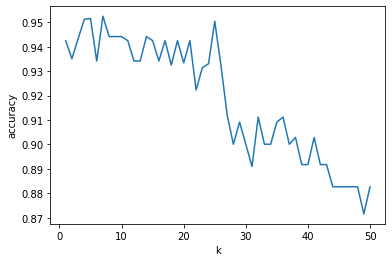

In [10]:
k_scores = []
for k in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(np.arange(1,51), k_scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [15]:
np.argmax(k_scores) # most accurate model is given by k=6 

6

# k-Nearest Neighbors Regressor (Boston House Prices)

In [23]:
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [24]:
boston = load_boston()

In [26]:
print("Boston data-shape: {0}".format(boston.data.shape)) # 506 examples, 13 features

Boston data-shape: (506, 13)


In [25]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target)

The metric for the accuracy of this regression algorithm is now r squared

In [31]:
def train_knn_reg(max_neighbors):
    train_score = []
    test_score = []
    models = []
    for neighbors in range(1, max_neighbors+1):
        model = KNeighborsRegressor(n_neighbors=neighbors)
        model.fit(X_train, y_train)
        train_score.append(model.score(X_train, y_train))
        test_score.append(model.score(X_test, y_test))
        models.append(model)
    return train_score, test_score, models

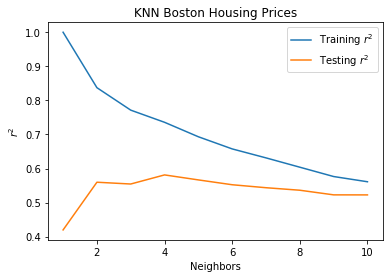

In [32]:
max_neighbors=10
train_score, test_score, models = train_knn_reg(max_neighbors)
neighbors = range(1, max_neighbors+1)
pyplot.plot(neighbors, train_score, label="Training $r^2$")
pyplot.plot(neighbors, test_score, label="Testing $r^2$")
pyplot.xlabel("Neighbors")
pyplot.ylabel("$r^2$")
pyplot.title("KNN Boston Housing Prices")
pyplot.legend()

In [34]:
print("Training r2 for 2 neigbors: {:.2f}".format(train_score[1]))
print("Testing r2 for 2 neighbors: {:.2f}".format(test_score[1]))

Training r2 for 2 neigbors: 0.84
Testing r2 for 2 neighbors: 0.56
